<a href="https://colab.research.google.com/github/sowmyamekala0403/NumberRecognition/blob/main/numberrecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NUMBER RECOGNITION

importing libraries

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

Split the data into train and test

In [ ]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
#Check the shape of X_test'
X_test.shape

(10000, 28, 28)

In [ ]:
#Check the shape of X_test'
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

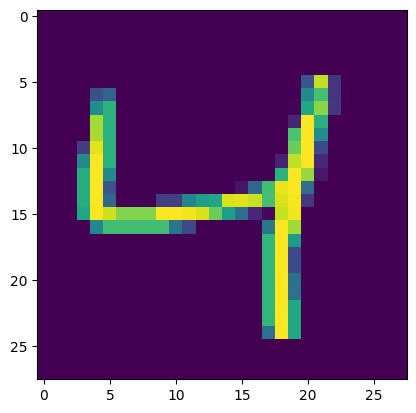

In [ ]:

#Plot the digital number using matplotlib
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

Normalization

In [ ]:
#Range of value now ranges from 0 to 1
X_train = X_train/255
X_test = X_test/255

     
Model Creation

In [ ]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 39s 25ms/step - loss: 0.2461 - accuracy: 0.9264 - val_loss: 0.0951 - val_accuracy: 0.9716
Epoch 2/25
1500/1500 [==============================] - 35s 23ms/step - loss: 0.1053 - accuracy: 0.9675 - val_loss: 0.0755 - val_accuracy: 0.9779
Epoch 3/25
1500/1500 [==============================] - 47s 32ms/step - loss: 0.0732 - accuracy: 0.9771 - val_loss: 0.0663 - val_accuracy: 0.9814
Epoch 4/25
1500/1500 [==============================] - 37s 25ms/step - loss: 0.0584 - accuracy: 0.9809 - val_loss: 0.0635 - val_accuracy: 0.9825
Epoch 5/25
1500/1500 [==============================] - 36s 24ms/step - loss: 0.0486 - accuracy: 0.9839 - val_loss: 0.0641 - val_accuracy: 0.9817
Epoch 6/25
1500/1500 [==============================] - 36s 24ms/step - loss: 0.0399 - accuracy: 0.9871 - val_loss: 0.0595 - val_accuracy: 0.9839
Epoch 7/25
1500/1500 [==============================] - 36s 24ms/step - loss: 0.0329 - accuracy: 0.9885 - val_loss: 0.0695 -

In [ ]:
y_prob = model.predict(X_test)

313/313 [==============================] - 2s 7ms/step


In [ ]:

y_pred = y_prob.argmax(axis=1)

In [ ]:

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9849

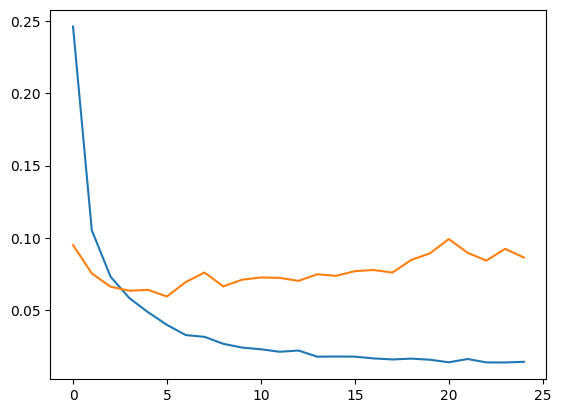

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

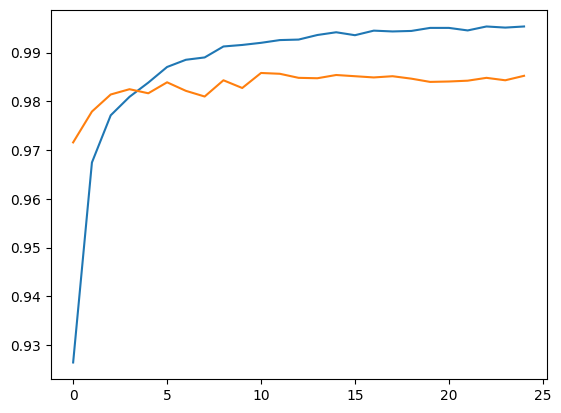

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

Testing the model

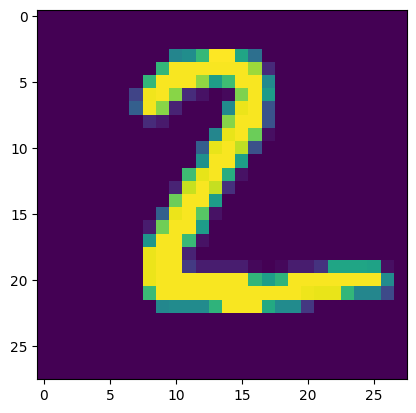

In [ ]:
plt.imshow(X_test[1])

In [ ]:
y_predicted = model.predict(X_test)
print("Predicted output :  ",np.argmax(y_predicted[1]))

313/313 [==============================] - 3s 8ms/step
Predicted output :   2


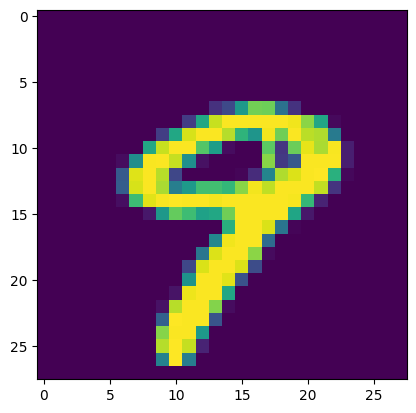

In [ ]:
plt.imshow(X_test[9])

In [ ]:
y_predicted = model.predict(X_test)
print("Predicted output :  ",np.argmax(y_predicted[9]))
     

313/313 [==============================] - 2s 7ms/step
Predicted output :   9


Checking Wrong Predicted Count

In [ ]:

y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    1,    2,    0,    0,    0,    2,    1,    1,    0],
       [   0, 1126,    4,    2,    0,    0,    1,    1,    1,    0],
       [   1,    1, 1022,    1,    0,    0,    1,    5,    1,    0],
       [   0,    0,    0, 1002,    0,    3,    0,    2,    2,    1],
       [   0,    0,    4,    0,  967,    0,    0,    0,    2,    9],
       [   2,    0,    0,   10,    0,  877,    1,    0,    2,    0],
       [   6,    3,    1,    1,    5,    3,  932,    0,    7,    0],
       [   0,    0,   11,    5,    0,    1,    0, 1005,    1,    5],
       [   4,    1,    1,    1,    0,    3,    0,    2,  961,    1],
       [   3,    2,    0,    4,    6,    2,    0,    4,    4,  984]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

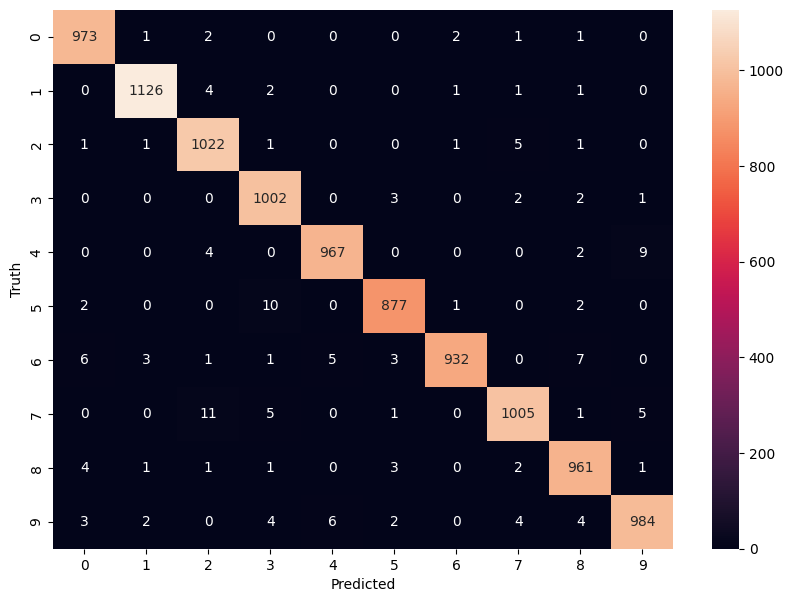

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
